In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
%config InlineBackend.figure_format = "svg"

In [ ]:
from google.colab import files
hotel_upload = files.upload()

Saving HotelCustomersDataset.xlsx to HotelCustomersDataset.xlsx


In [ ]:
hotels = pd.read_excel("HotelCustomersDataset.xlsx" , sheet_name = "Sheet1")

In [ ]:
pd.ExcelFile("HotelCustomersDataset.xlsx").sheet_names

['Sheet1']

In [ ]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.to_datetime("2018-12-31")

Timestamp('2018-12-31 00:00:00')

In [ ]:
pd.to_timedelta(hotels["DaysSinceCreation"] , unit ="D")

,DaysSinceCreation
0,150 days
1,1095 days
2,1095 days
3,1095 days
4,1095 days
...,...
83585,0 days
83586,0 days
83587,0 days
83588,0 days


In [ ]:
pd.to_datetime("2018-12-31") - pd.to_timedelta(hotels["DaysSinceCreation"] , unit ="D")

,DaysSinceCreation
0,2018-08-03
1,2016-01-01
2,2016-01-01
3,2016-01-01
4,2016-01-01
...,...
83585,2018-12-31
83586,2018-12-31
83587,2018-12-31
83588,2018-12-31


In [ ]:
hotels["date"] =  (pd.to_datetime("2018-12-31")
                   - pd.to_timedelta(hotels["DaysSinceCreation"], unit="D"))

In [ ]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


# Assignment 1: Plotting DataFrames

* Plot the `LodgingRevenue` and `OtherRevenue` columns in a line chart from the `monthly_revenue` DataFrame created below.  
* Make sure your x-axis is the `date` column.

In [ ]:
daily_revenue = hotels.groupby(["date"]).agg({"LodgingRevenue":"sum", "OtherRevenue":"sum"})
daily_revenue

,LodgingRevenue,OtherRevenue
date,,
2016-01-01,10591.35,2472.96
2016-01-02,16600.46,11398.50
2016-01-03,13701.23,7978.80
2016-01-04,2896.70,750.98
2016-01-05,13940.15,6580.39
...,...,...
2018-12-27,12226.74,3683.15
2018-12-28,13728.79,3512.40
2018-12-29,25279.16,7768.88


In [ ]:
daily_revenue.resample("ME").sum().iloc[:5]

,LodgingRevenue,OtherRevenue
date,,
2016-01-31,124531.34,52190.50
2016-02-29,131689.12,51203.13
2016-03-31,443476.86,127336.11
2016-04-30,500966.80,145228.87
2016-05-31,634200.17,143359.35


In [ ]:
monthly_revenue = daily_revenue.resample("ME").sum()
monthly_revenue

,LodgingRevenue,OtherRevenue
date,,
2016-01-31,124531.34,52190.50
2016-02-29,131689.12,51203.13
2016-03-31,443476.86,127336.11
2016-04-30,500966.80,145228.87
2016-05-31,634200.17,143359.35
2016-06-30,588701.29,151214.74
2016-07-31,749828.61,210745.90
2016-08-31,842445.29,238536.04
2016-09-30,774270.05,181678.34


In [ ]:
monthly_revenue.columns

Index(['LodgingRevenue', 'OtherRevenue'], dtype='object')

<Figure size 1000x800 with 0 Axes>

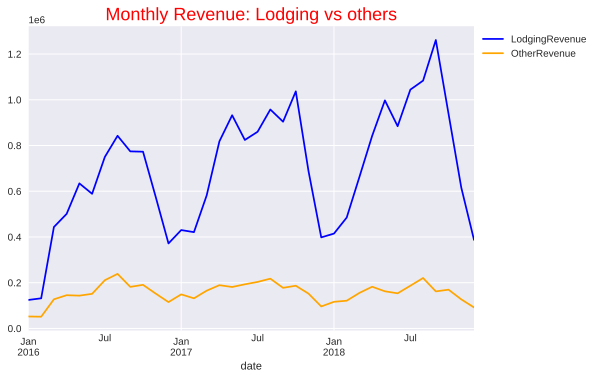

In [ ]:
plt.figure(figsize=(10,8))
monthly_revenue.plot(color = ["blue","orange"] , label = "Monthly Revenue")

plt.title("Monthly Revenue: Lodging vs others" , fontsize = 18 , color = "red")
plt.legend(bbox_to_anchor = (1,1))
plt.show()

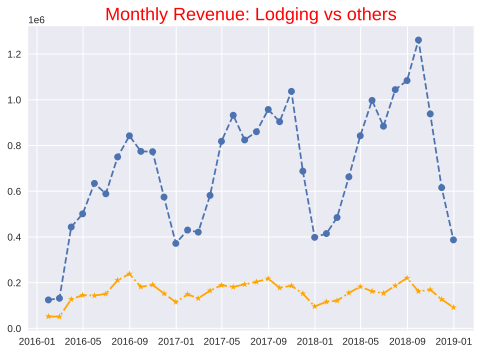

In [ ]:
fig, ax = plt.subplots()

ax.plot(monthly_revenue.index , monthly_revenue["LodgingRevenue"] , ls = "--", marker ="o")
ax.plot(monthly_revenue.index , monthly_revenue["OtherRevenue"] , ls = "-." , marker = "*", c ="orange")
ax.set_title("Monthly Revenue: Lodging vs others", color='red', size = 18)
plt.show()

In [ ]:
plt.colormaps()[:5]

['magma', 'inferno', 'plasma', 'viridis', 'cividis']

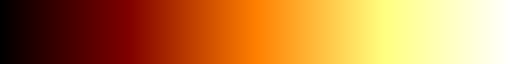

In [ ]:
plt.get_cmap('afmhot')

In [ ]:
np.random.randint(low = 0 , high = len(plt.colormaps()) , size = 1) # display an array

array([174])

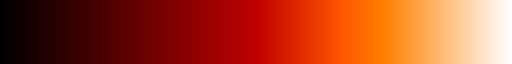

In [ ]:
random_number = np.random.randint(low = 0 , high = len(plt.colormaps()))
random_cmap = plt.colormaps()[random_number]
plt.get_cmap(random_cmap)

# Assignment 2: Formatted Line Chart

Plot the monthly sum of `LodgingRevenue` and `OtherRevenue`.

Make sure to add titles and a y-axis label, remove the top and right borders, and add a legend.

Consider modifying the font sizes as well.

Thanks!

In [ ]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


In [ ]:
daily_revenue = (
    hotels
    .groupby("date")
    .agg({"LodgingRevenue":"sum", "OtherRevenue":"sum"})
)
daily_revenue

,LodgingRevenue,OtherRevenue
date,,
2016-01-01,10591.35,2472.96
2016-01-02,16600.46,11398.50
2016-01-03,13701.23,7978.80
2016-01-04,2896.70,750.98
2016-01-05,13940.15,6580.39
...,...,...
2018-12-27,12226.74,3683.15
2018-12-28,13728.79,3512.40
2018-12-29,25279.16,7768.88


In [ ]:
monthly_revenue = daily_revenue.resample("M").sum()
monthly_revenue

/tmp/ipython-input-945006726.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = daily_revenue.resample("M").sum()


,LodgingRevenue,OtherRevenue
date,,
2016-01-31,124531.34,52190.50
2016-02-29,131689.12,51203.13
2016-03-31,443476.86,127336.11
2016-04-30,500966.80,145228.87
2016-05-31,634200.17,143359.35
2016-06-30,588701.29,151214.74
2016-07-31,749828.61,210745.90
2016-08-31,842445.29,238536.04
2016-09-30,774270.05,181678.34


In [ ]:
monthly_revenue.columns

Index(['LodgingRevenue', 'OtherRevenue'], dtype='object')

In [ ]:
import datetime as dt

In [ ]:
monthly_revenue.LodgingRevenue.idxmax() - dt.datetime(1970,1,1)

Timedelta('17804 days 00:00:00')

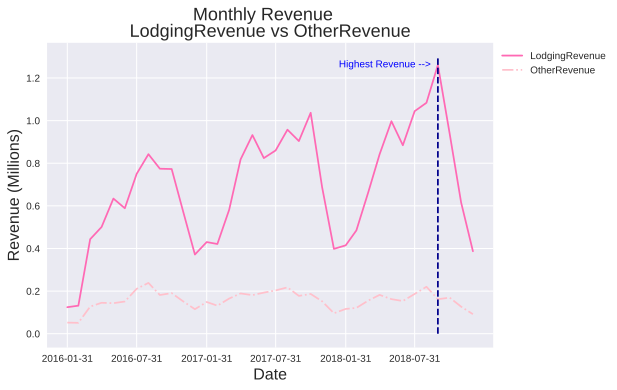

In [ ]:
fig, ax = plt.subplots()
fig.suptitle("Monthly Revenue" , fontsize = 18 , y = .97 , x = .5)

ax.set_title("LodgingRevenue vs OtherRevenue" , fontsize = 18)
ax.plot(monthly_revenue.index , monthly_revenue["LodgingRevenue"]/(10**6) , ls = "solid", c = "hotpink")
ax.plot(monthly_revenue.index , monthly_revenue["OtherRevenue"]/(10**6) , ls = "-." , c = "pink")


ax.set_xlabel("Date", fontsize = 16)
ax.set_ylabel("Revenue (Millions)", fontsize = 16)
ax.set_xticks(monthly_revenue.index[::6])

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.vlines(x = 17804   , ymin=0 , ymax = 1.3 , color = "darkblue" , ls = "--")
# x: monthly_revenue.LodgingRevenue.idxmax() - dt.datetime(1970,1,1)
ax.text(17804 - 260, 1.25 , "Highest Revenue -->" , c = "blue", fontsize = 10)

#ax.set_yticks([0, 1.4])

ax.legend(monthly_revenue.columns, bbox_to_anchor = (1,1) , ncol = 1)
plt.show()

# Assignment 2: Dual Axis Line Chart

* Plot the sum of nights booked and the sum of cancellations on a quarterly basis (resample("Q") will help).

* Plot them in the same chart but different Y-Axes.

* Make sure to add titles and axis labels, remove scientific notation, and add a legend.

* Consider modifying the font sizes as well.

Thanks!

*Note: I accidentally repeated the assignment numbers, but leaving as is to align with video numbering*

In [ ]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


In [ ]:
hotels.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'AverageLeadTime',
       'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'date'],
      dtype='object')

In [ ]:
room_nights = hotels.groupby("date").agg({'RoomNights':'sum' , 'BookingsCanceled':'sum'})
room_nights

,RoomNights,BookingsCanceled
date,,
2016-01-01,147,0
2016-01-02,170,0
2016-01-03,217,0
2016-01-04,38,0
2016-01-05,211,0
...,...,...
2018-12-27,125,0
2018-12-28,139,0
2018-12-29,250,0


In [ ]:
quarterly_bookings = room_nights.resample("QE").sum()
quarterly_bookings

,RoomNights,BookingsCanceled
date,,
2016-03-31,8464,15
2016-06-30,15535,26
2016-09-30,19517,27
2016-12-31,15404,17
2017-03-31,15206,12
2017-06-30,19159,9
2017-09-30,19844,4
2017-12-31,15691,13
2018-03-31,14338,17


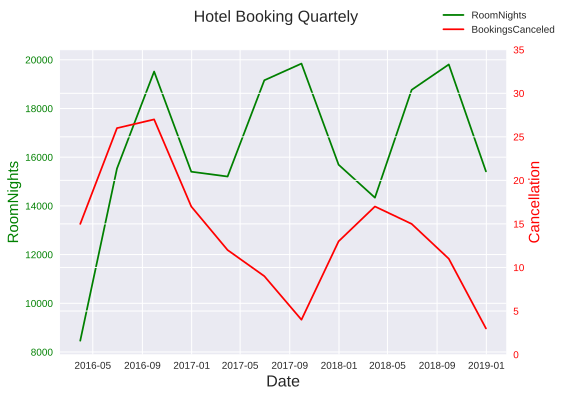

In [ ]:
fig , ax = plt.subplots()
fig.suptitle("Hotel Booking Quartely" , fontsize = 16)

ax.plot(quarterly_bookings.index ,
        quarterly_bookings["RoomNights"],
        c = "green")
ax.set_xlabel("Date" , fontsize = 16)
ax.tick_params(axis = 'y' , colors = "green")
ax.set_ylabel("RoomNights" , c = "green" , fontsize = 15)

ax2 = ax.twinx()
ax2.plot(quarterly_bookings.index,
         quarterly_bookings["BookingsCanceled"],
         c = "red")
ax2.set_ylabel("Cancellation" , c = "red", fontsize = 15)
ax2.set_ylim([0,35])
ax2.tick_params(axis='y' , colors = "red")

fig.legend(quarterly_bookings.columns, bbox_to_anchor = (1,1), ncol = 1)
plt.show()

In [ ]:
#new_index = pd.to_datetime([str(x)[:10] for x in quarterly_bookings.index.tolist()])

# Assignment 3: Bar Chart

* Create a bar chart of total room nights booked by country. Limit your results to the top 10 countries.

* Then, build a horizontal bar chart of lodging revenue by country for the same countries in your room nights chart.

* As always, make sure to add labels to your chart!

In [ ]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


In [ ]:
hotels.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'AverageLeadTime',
       'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'date'],
      dtype='object')

In [ ]:
countries = (hotels.groupby(["Nationality"]).
             agg({"LodgingRevenue":"sum" , "RoomNights" : "sum"}).
             sort_values("RoomNights" , ascending = False))
countries = countries.iloc[:10]
countries

,LodgingRevenue,RoomNights
Nationality,,
FRA,3809315.59,31018
DEU,3113382.55,26334
PRT,2715008.72,24334
GBR,2693123.61,20822
ESP,1475909.33,10877
ITA,1032729.72,8046
BEL,1047661.98,7758
NLD,904460.78,6619
BRA,787928.01,6535


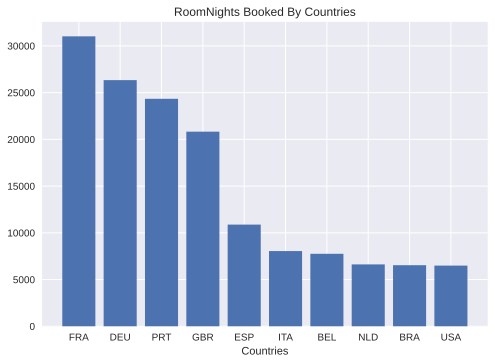

In [ ]:
fig , ax = plt.subplots()
ax.bar(countries.index ,
       countries.RoomNights)

ax.set_title("RoomNights Booked By Countries")
ax.set_xlabel("Countries")

plt.show()

In [ ]:
hotels.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'AverageLeadTime',
       'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'date'],
      dtype='object')

In [ ]:
countries["LodgingRevenue"].sort_values(ascending=False)

,LodgingRevenue
Nationality,
FRA,3809315.59
DEU,3113382.55
PRT,2715008.72
GBR,2693123.61
ESP,1475909.33
BEL,1047661.98
ITA,1032729.72
NLD,904460.78
USA,903336.11


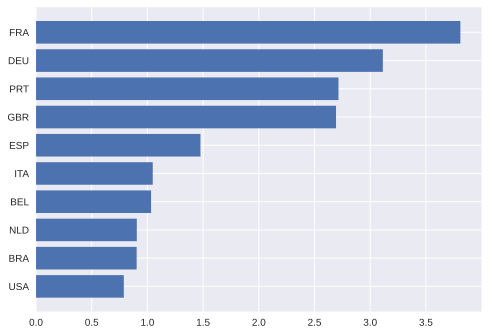

In [ ]:
fig , ax = plt.subplots()
ax.barh(countries.index[::-1],
        countries["LodgingRevenue"].sort_values(ascending=False).iloc[::-1]/(10**6))
ax.set_title("")
plt.show()

# Assignment 4: Advanced Bar Charts

* Build a grouped bar chart of our top 5 countries with LodgingRevenue and OtherRevenue as bars for each.
* Then, build a 100% bar chart stacked bar chart of LodgingRevenue and OtherRevenue. Add a reference line at 80%, which is our baseline.

Thanks!

In [ ]:
countries

,LodgingRevenue,RoomNights
Nationality,,
FRA,3809315.59,31018
DEU,3113382.55,26334
PRT,2715008.72,24334
GBR,2693123.61,20822
ESP,1475909.33,10877
ITA,1032729.72,8046
BEL,1047661.98,7758
NLD,904460.78,6619
BRA,787928.01,6535


In [ ]:
hotels.groupby(by = "Nationality").agg({"LodgingRevenue":"sum", "OtherRevenue":"sum"}).sort_values(by = "LodgingRevenue", ascending=0).iloc[:5]

,LodgingRevenue,OtherRevenue
Nationality,,
FRA,3809315.59,1033166.30
DEU,3113382.55,725541.53
PRT,2715008.72,665634.58
GBR,2693123.61,591212.77
ESP,1475909.33,319840.82


In [ ]:
selection = ["FRA", "DEU", "PRT", "GBR", "ESP"]
country_subset = (hotels.
                  groupby(by = "Nationality").
                  agg({"LodgingRevenue":"sum", "OtherRevenue":"sum"}).
                  sort_values(by = "LodgingRevenue", ascending=0).
                  iloc[:5])
country_subset

,LodgingRevenue,OtherRevenue
Nationality,,
FRA,3809315.59,1033166.30
DEU,3113382.55,725541.53
PRT,2715008.72,665634.58
GBR,2693123.61,591212.77
ESP,1475909.33,319840.82


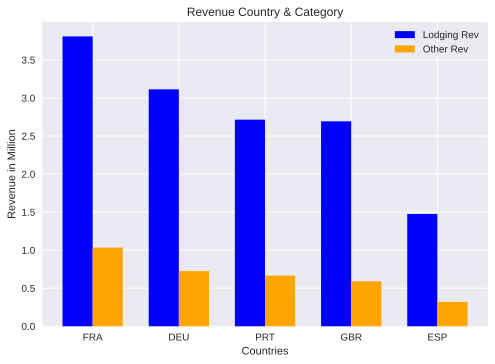

In [ ]:
fig , ax = plt.subplots()

width = 0.35
x = np.arange(len(selection))
ax.bar(x - width/2 ,
       country_subset.LodgingRevenue/(10**6) ,
       width = width ,
       color = "blue",
       label = "Lodging Rev" )

ax.bar(x + width/2,
        country_subset.OtherRevenue/(10**6),
        width = width ,
        color = "orange",
        label = "Other Rev")

ax.set_title("Revenue Country & Category")
ax.set_xlabel("Countries")
ax.set_ylabel("Revenue in Million")

plt.legend()
plt.xticks(x ,labels= selection)
plt.show()

Then, build a 100% bar chart stacked bar chart of LodgingRevenue and OtherRevenue. Add a reference line at 80%, which is our baseline.

In [ ]:
country_subset = country_subset.apply(lambda x : x/sum(x) * 100 , axis = 1)
country_subset

,LodgingRevenue,OtherRevenue
Nationality,,
FRA,78.664529,21.335471
DEU,81.100394,18.899606
PRT,80.310417,19.689583
GBR,81.999019,18.000981
ESP,82.189013,17.810987


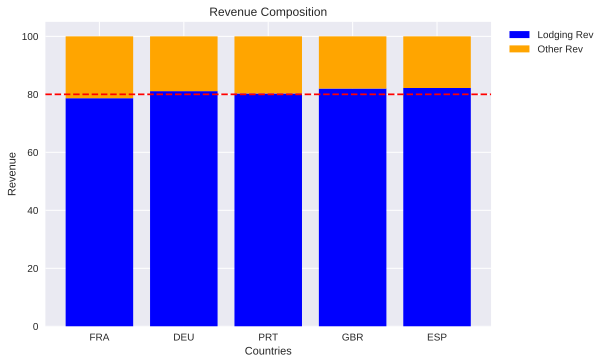

In [ ]:
fig , ax = plt.subplots()
ax.bar(selection ,
       country_subset.LodgingRevenue,
       color = "blue",
       label = "Lodging Rev")

ax.bar(selection ,
       country_subset.OtherRevenue,
       label = "Other Rev",
       color = "orange",
       bottom = country_subset.LodgingRevenue)

ax.set_title("Revenue Composition")
ax.set_xlabel("Countries")
ax.set_ylabel("Revenue")
ax.axhline(80 ,xmin =0 , xmax = 1, ls = "--", c= "red")


plt.legend(bbox_to_anchor = (1.25 , 1))
plt.xticks(range(len(selection)) , selection)
plt.show()

# Assignment 5: Pie Charts

* Build a pie chart of LodgingRevenue by country. Include a slice for our top 5 countries and combine the rest into an 'other' Category.
* Then, convert the pie chart into a donut chart.

In [ ]:
~hotels["Nationality"].isin(selection)

,Nationality
0,False
1,False
2,False
3,False
4,False
...,...
83585,True
83586,True
83587,True
83588,True


In [ ]:
others = hotels.loc[~hotels["Nationality"].isin(selection)].groupby("Nationality").agg({"LodgingRevenue":"sum"}).sort_values("LodgingRevenue",ascending=False).sum()
others.index = ["Others"]
others.name = "LodgingRevenue"
others

,LodgingRevenue
Others,11170126.66


In [ ]:
five_countries = hotels.loc[hotels["Nationality"].isin(selection)].groupby("Nationality").agg({"LodgingRevenue":"sum"}).sort_values("LodgingRevenue",ascending=False)
five_countries


,LodgingRevenue
Nationality,
FRA,3809315.59
DEU,3113382.55
PRT,2715008.72
GBR,2693123.61
ESP,1475909.33


In [ ]:
country_rev = pd.concat([five_countries , others] , axis = 0)
country_rev

,LodgingRevenue
FRA,3809315.59
DEU,3113382.55
PRT,2715008.72
GBR,2693123.61
ESP,1475909.33
Others,11170126.66


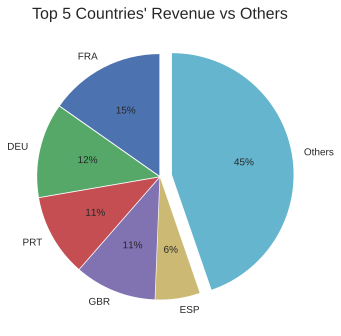

In [ ]:
fig , ax = plt.subplots()

ax.pie(country_rev.LodgingRevenue ,
       labels= country_rev.index ,
       startangle = 90,
       explode=[0.01,0.01,0.01,0.01,0.01,0.1],
       autopct = "%.0f%%")
ax.set_title("Top 5 Countries' Revenue vs Others", fontsize = 16)
plt.show()

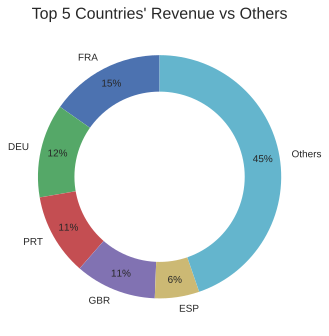

In [ ]:
fig , ax = plt.subplots()

ax.pie(country_rev.LodgingRevenue ,
       labels= country_rev.index ,
       startangle = 90,
       #explode=[0.01,0.01,0.01,0.01,0.01,0.1],
       autopct = "%.0f%%",
       pctdistance=.86,
       )

donut_hole = plt.Circle(xy = (0,0) , radius=0.7 , fc = "white")
fig = plt.gcf()
fig.gca().add_artist(donut_hole)

ax.set_title("Top 5 Countries' Revenue vs Others", fontsize = 16)
plt.show()

# Assignment 6: Scatterplots & Histograms

* Build a scatterplot comparing average nights stayed by country to average revenue per customer by country.
* Then, build a bubble chart by specifying the size of the bubbles as the average nightly revenue.
* Finally, build a histogram comparing customer age in Germany to the Customer age in france. Make sure to tweak your alpha!

Column Creation Code:

<mark style="background-color: black">
    hotels.assign(total_revenue = hotels["LodgingRevenue"] + hotels["OtherRevenue"],
                      revenue_per_night = lambda x: x["total_revenue"] / x["RoomNights"])</mark>


Thanks!

In [ ]:
hotels["Total_Revenue"] = hotels["LodgingRevenue"] + hotels["OtherRevenue"]
hotels["Revenue_per_Night"] = hotels["Total_Revenue"] / hotels["RoomNights"]

In [ ]:
hotels_scatter = hotels.groupby(["Nationality"]).agg({"RoomNights":"mean" ,
                                                      "Total_Revenue":"mean",
                                                      "Revenue_per_Night":"mean",
                                                      })
hotels_scatter

,RoomNights,Total_Revenue,Revenue_per_Night
Nationality,,,
ABW,3.666667,717.740000,204.421111
AGO,3.461538,632.826868,177.745487
AIA,1.666667,430.033333,232.737500
ALB,2.846154,328.298462,118.783788
AND,2.000000,537.178571,283.452381
...,...,...,...
WLF,0.500000,68.600000,137.200000
WSM,2.000000,342.000000,171.000000
YEM,0.000000,0.000000,NaN


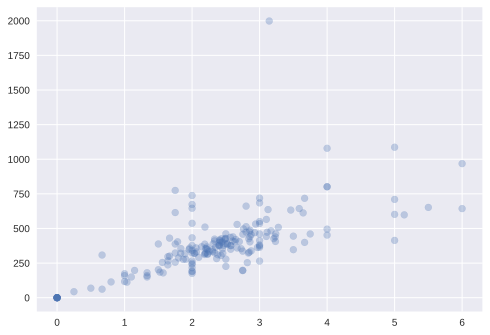

In [ ]:
plt.scatter(hotels_scatter["RoomNights"] ,
            hotels_scatter["Total_Revenue"], alpha = 0.3 )
plt.show()

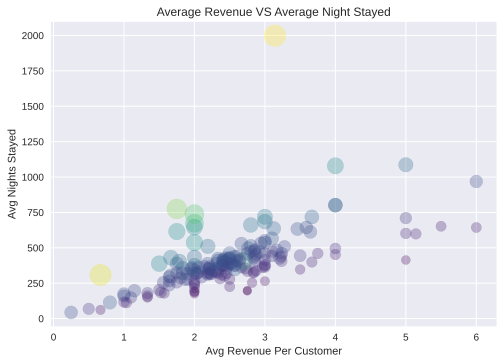

In [ ]:
plt.scatter(hotels_scatter["Ave"] ,
            hotels_scatter["Total_Revenue"],
            s =  hotels_scatter["Revenue_per_Night"],
            cmap = "viridis",
            c = hotels_scatter["Revenue_per_Night"],
            alpha = 0.3 )

plt.title("Average Revenue VS Average Night Stayed")
plt.xlabel("Avg Revenue Per Customer")
plt.ylabel("Avg Nights Stayed")
plt.show()

In [ ]:
hotels[(hotels["Nationality"] == "DEU")]["Age"]

,Age
2,31.0
36,30.0
37,28.0
166,60.0
167,50.0
...,...
83557,50.0
83560,48.0
83561,47.0
83580,48.0


In [ ]:
selection

['FRA', 'DEU', 'PRT', 'GBR', 'ESP']

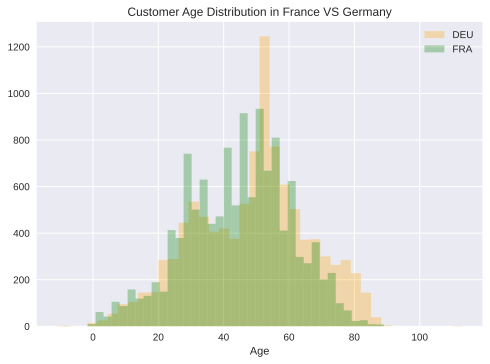

In [ ]:
fig , ax = plt.subplots()

ax.hist(hotels.loc[(hotels["Nationality"] == "DEU"), "Age"],
        alpha = 0.3,
        color = "orange",
        label = "DEU",
        bins = 40)


ax.hist(hotels.loc[(hotels["Nationality"] == "FRA") , "Age"],
        alpha = 0.3,
        color = "green",
        label = "FRA",
        bins = 40)

ax.set_title("Customer Age Distribution in France VS Germany")

plt.xlabel("Age")
plt.legend()
plt.show()